In [1]:
import pandas as pd
import numpy as np
import warnings

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_excel('mixture_3.xlsx')

In [3]:
df.head()

,Unnamed: 0,uniprod_id,Entry Name,affects,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,...,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5,PCP_SS_HE,PCP_SS_ST,PCP_SS_CO,PCP_SA_BU,PCP_SA_EX,PCP_SA_IN
0,0,O95190,OAZ2_HUMAN,0,0.122,0.132,0.746,0.201,0.519,0.439,...,-0.454,-0.066,-0.409,0.209,0.392,0.265,0.344,0.439,0.339,0.270
1,1,Q06033,ITIH3,1,0.131,0.134,0.735,0.201,0.480,0.393,...,-0.440,-0.286,-0.486,0.089,0.415,0.298,0.288,0.417,0.336,0.249
2,2,Q9NRX6,TMEM167B,1,0.135,0.027,0.838,0.176,0.649,0.514,...,-0.774,-0.418,-0.081,-0.044,0.405,0.459,0.135,0.649,0.149,0.189
3,3,Q9NRX3,NUA4L_HUMAN,0,0.184,0.080,0.736,0.161,0.529,0.437,...,-0.155,-0.249,-0.037,0.174,0.460,0.218,0.322,0.437,0.310,0.241
4,4,Q02763,TIE2_HUMAN,0,0.133,0.113,0.754,0.222,0.480,0.411,...,-0.459,-0.205,-0.387,0.049,0.417,0.297,0.286,0.437,0.318,0.251


PREPROCESSING

In [4]:
df.isna().sum()

Unnamed: 0    0
uniprod_id    0
Entry Name    0
affects       0
PCP_PC        0
PCP_NC        0
PCP_NE        0
PCP_PO        0
PCP_NP        0
PCP_AL        0
PCP_CY        0
PCP_AR        0
PCP_AC        0
PCP_BS        0
PCP_NE_pH     0
PCP_HB        0
PCP_HL        0
PCP_NT        0
PCP_HX        0
PCP_SC        0
PCP_TN        0
PCP_SM        0
PCP_LR        0
PCP_Z1        0
PCP_Z2        0
PCP_Z3        0
PCP_Z4        0
PCP_Z5        0
PCP_SS_HE     0
PCP_SS_ST     0
PCP_SS_CO     0
PCP_SA_BU     0
PCP_SA_EX     0
PCP_SA_IN     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(603, 34)

In [7]:
df=df.drop(columns=['Unnamed: 0','uniprod_id','Entry Name'])

if required to normalise or standardise columns

In [8]:
df.describe()

,affects,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,...,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5,PCP_SS_HE,PCP_SS_ST,PCP_SS_CO,PCP_SA_BU,PCP_SA_EX,PCP_SA_IN
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,...,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,0.502488,0.146406,0.125496,0.728093,0.227862,0.464575,0.395224,0.059629,0.073358,0.125496,...,-0.430672,-0.249620,-0.405862,0.156672,0.464463,0.247829,0.287705,0.405537,0.333612,0.262605
std,0.500409,0.035658,0.040739,0.059736,0.041192,0.065309,0.059577,0.028800,0.028214,0.040739,...,0.194485,0.184622,0.157946,0.116731,0.069425,0.057594,0.054994,0.062666,0.063307,0.045391
min,0.000000,0.040000,0.000000,0.485000,0.104000,0.276000,0.196000,0.003000,0.009000,0.000000,...,-1.117000,-0.932000,-1.158000,-0.267000,0.223000,0.115000,0.088000,0.208000,0.137000,0.119000
25%,0.000000,0.124000,0.102500,0.689000,0.203000,0.422500,0.357500,0.040000,0.055000,0.102500,...,-0.548500,-0.345000,-0.509000,0.083500,0.421000,0.207000,0.254000,0.364000,0.299000,0.234000
50%,1.000000,0.142000,0.122000,0.733000,0.228000,0.461000,0.394000,0.054000,0.072000,0.122000,...,-0.416000,-0.241000,-0.420000,0.155000,0.457000,0.248000,0.283000,0.405000,0.333000,0.260000
75%,1.000000,0.164000,0.148500,0.763000,0.251000,0.500500,0.428000,0.075000,0.089000,0.148500,...,-0.311500,-0.153000,-0.316000,0.229000,0.500000,0.285000,0.321000,0.439500,0.375000,0.291000
max,1.000000,0.301000,0.375000,0.932000,0.594000,0.727000,0.636000,0.187000,0.188000,0.375000,...,0.243000,0.954000,0.087000,0.586000,0.780000,0.459000,0.568000,0.654000,0.565000,0.443000


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
column_stats = df.describe().loc[['mean', 'std']]

std_threshold = 1.0  #threshold for standardization
minmax_threshold = 0.05  #threshold for normalization

columns_to_standardize = []
columns_to_normalize = []

for column in df.columns:
    mean = column_stats[column]['mean']
    std = column_stats[column]['std']

    if std > std_threshold:
        columns_to_standardize.append(column)
    if np.abs(mean) > minmax_threshold:
        columns_to_normalize.append(column)

print("Columns to standardize:", columns_to_standardize)
print("Columns to normalize:", columns_to_normalize)


Columns to standardize: []
Columns to normalize: ['affects', 'PCP_PC', 'PCP_NC', 'PCP_NE', 'PCP_PO', 'PCP_NP', 'PCP_AL', 'PCP_CY', 'PCP_AR', 'PCP_AC', 'PCP_BS', 'PCP_NE_pH', 'PCP_HB', 'PCP_HL', 'PCP_NT', 'PCP_HX', 'PCP_TN', 'PCP_SM', 'PCP_LR', 'PCP_Z1', 'PCP_Z2', 'PCP_Z3', 'PCP_Z4', 'PCP_Z5', 'PCP_SS_HE', 'PCP_SS_ST', 'PCP_SS_CO', 'PCP_SA_BU', 'PCP_SA_EX', 'PCP_SA_IN']


In [10]:
columns_to_normalize=columns_to_normalize[1:]

In [11]:
columns_to_normalize

['PCP_PC',
 'PCP_NC',
 'PCP_NE',
 'PCP_PO',
 'PCP_NP',
 'PCP_AL',
 'PCP_CY',
 'PCP_AR',
 'PCP_AC',
 'PCP_BS',
 'PCP_NE_pH',
 'PCP_HB',
 'PCP_HL',
 'PCP_NT',
 'PCP_HX',
 'PCP_TN',
 'PCP_SM',
 'PCP_LR',
 'PCP_Z1',
 'PCP_Z2',
 'PCP_Z3',
 'PCP_Z4',
 'PCP_Z5',
 'PCP_SS_HE',
 'PCP_SS_ST',
 'PCP_SS_CO',
 'PCP_SA_BU',
 'PCP_SA_EX',
 'PCP_SA_IN']

In [12]:
# Normalize and standardize the selected columns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
for column in columns_to_normalize:
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(df[[column]])

for column in columns_to_standardize:
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[[column]])



In [13]:
df.head()

,affects,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,...,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5,PCP_SS_HE,PCP_SS_ST,PCP_SS_CO,PCP_SA_BU,PCP_SA_EX,PCP_SA_IN
0,0,0.314176,0.352000,0.583893,0.197959,0.538803,0.552273,0.472826,0.391061,0.352000,...,0.487500,0.459173,0.601606,0.558030,0.303411,0.436047,0.533333,0.517937,0.471963,0.466049
1,1,0.348659,0.357333,0.559284,0.197959,0.452328,0.447727,0.222826,0.474860,0.357333,...,0.497794,0.342524,0.539759,0.417351,0.344704,0.531977,0.416667,0.468610,0.464953,0.401235
2,1,0.363985,0.072000,0.789709,0.146939,0.827051,0.722727,0.059783,0.854749,0.072000,...,0.252206,0.272534,0.865060,0.261430,0.326750,1.000000,0.097917,0.988789,0.028037,0.216049
3,0,0.551724,0.213333,0.561521,0.116327,0.560976,0.547727,0.418478,0.525140,0.213333,...,0.707353,0.362142,0.900402,0.516999,0.425494,0.299419,0.487500,0.513453,0.404206,0.376543
4,0,0.356322,0.301333,0.601790,0.240816,0.452328,0.488636,0.293478,0.407821,0.301333,...,0.483824,0.385472,0.619277,0.370457,0.348294,0.529070,0.412500,0.513453,0.422897,0.407407


In [14]:
df.describe()

,affects,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,...,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5,PCP_SS_HE,PCP_SS_ST,PCP_SS_CO,PCP_SA_BU,PCP_SA_EX,PCP_SA_IN
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,...,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,0.502488,0.407687,0.334656,0.543832,0.252780,0.418127,0.452782,0.307764,0.359543,0.334656,...,0.504653,0.361813,0.604127,0.496684,0.433506,0.386131,0.416052,0.442909,0.459374,0.443226
std,0.500409,0.136622,0.108638,0.133637,0.084066,0.144809,0.135403,0.156523,0.157621,0.108638,...,0.143004,0.097891,0.126864,0.136848,0.124641,0.167425,0.114570,0.140506,0.147914,0.140097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.321839,0.273333,0.456376,0.202041,0.324834,0.367045,0.201087,0.256983,0.273333,...,0.418015,0.311241,0.521285,0.410903,0.355476,0.267442,0.345833,0.349776,0.378505,0.354938
50%,1.000000,0.390805,0.325333,0.554810,0.253061,0.410200,0.450000,0.277174,0.351955,0.325333,...,0.515441,0.366384,0.592771,0.494725,0.420108,0.386628,0.406250,0.441704,0.457944,0.435185
75%,1.000000,0.475096,0.396000,0.621924,0.300000,0.497783,0.527273,0.391304,0.446927,0.396000,...,0.592279,0.413043,0.676305,0.581477,0.497307,0.494186,0.485417,0.519058,0.556075,0.530864
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


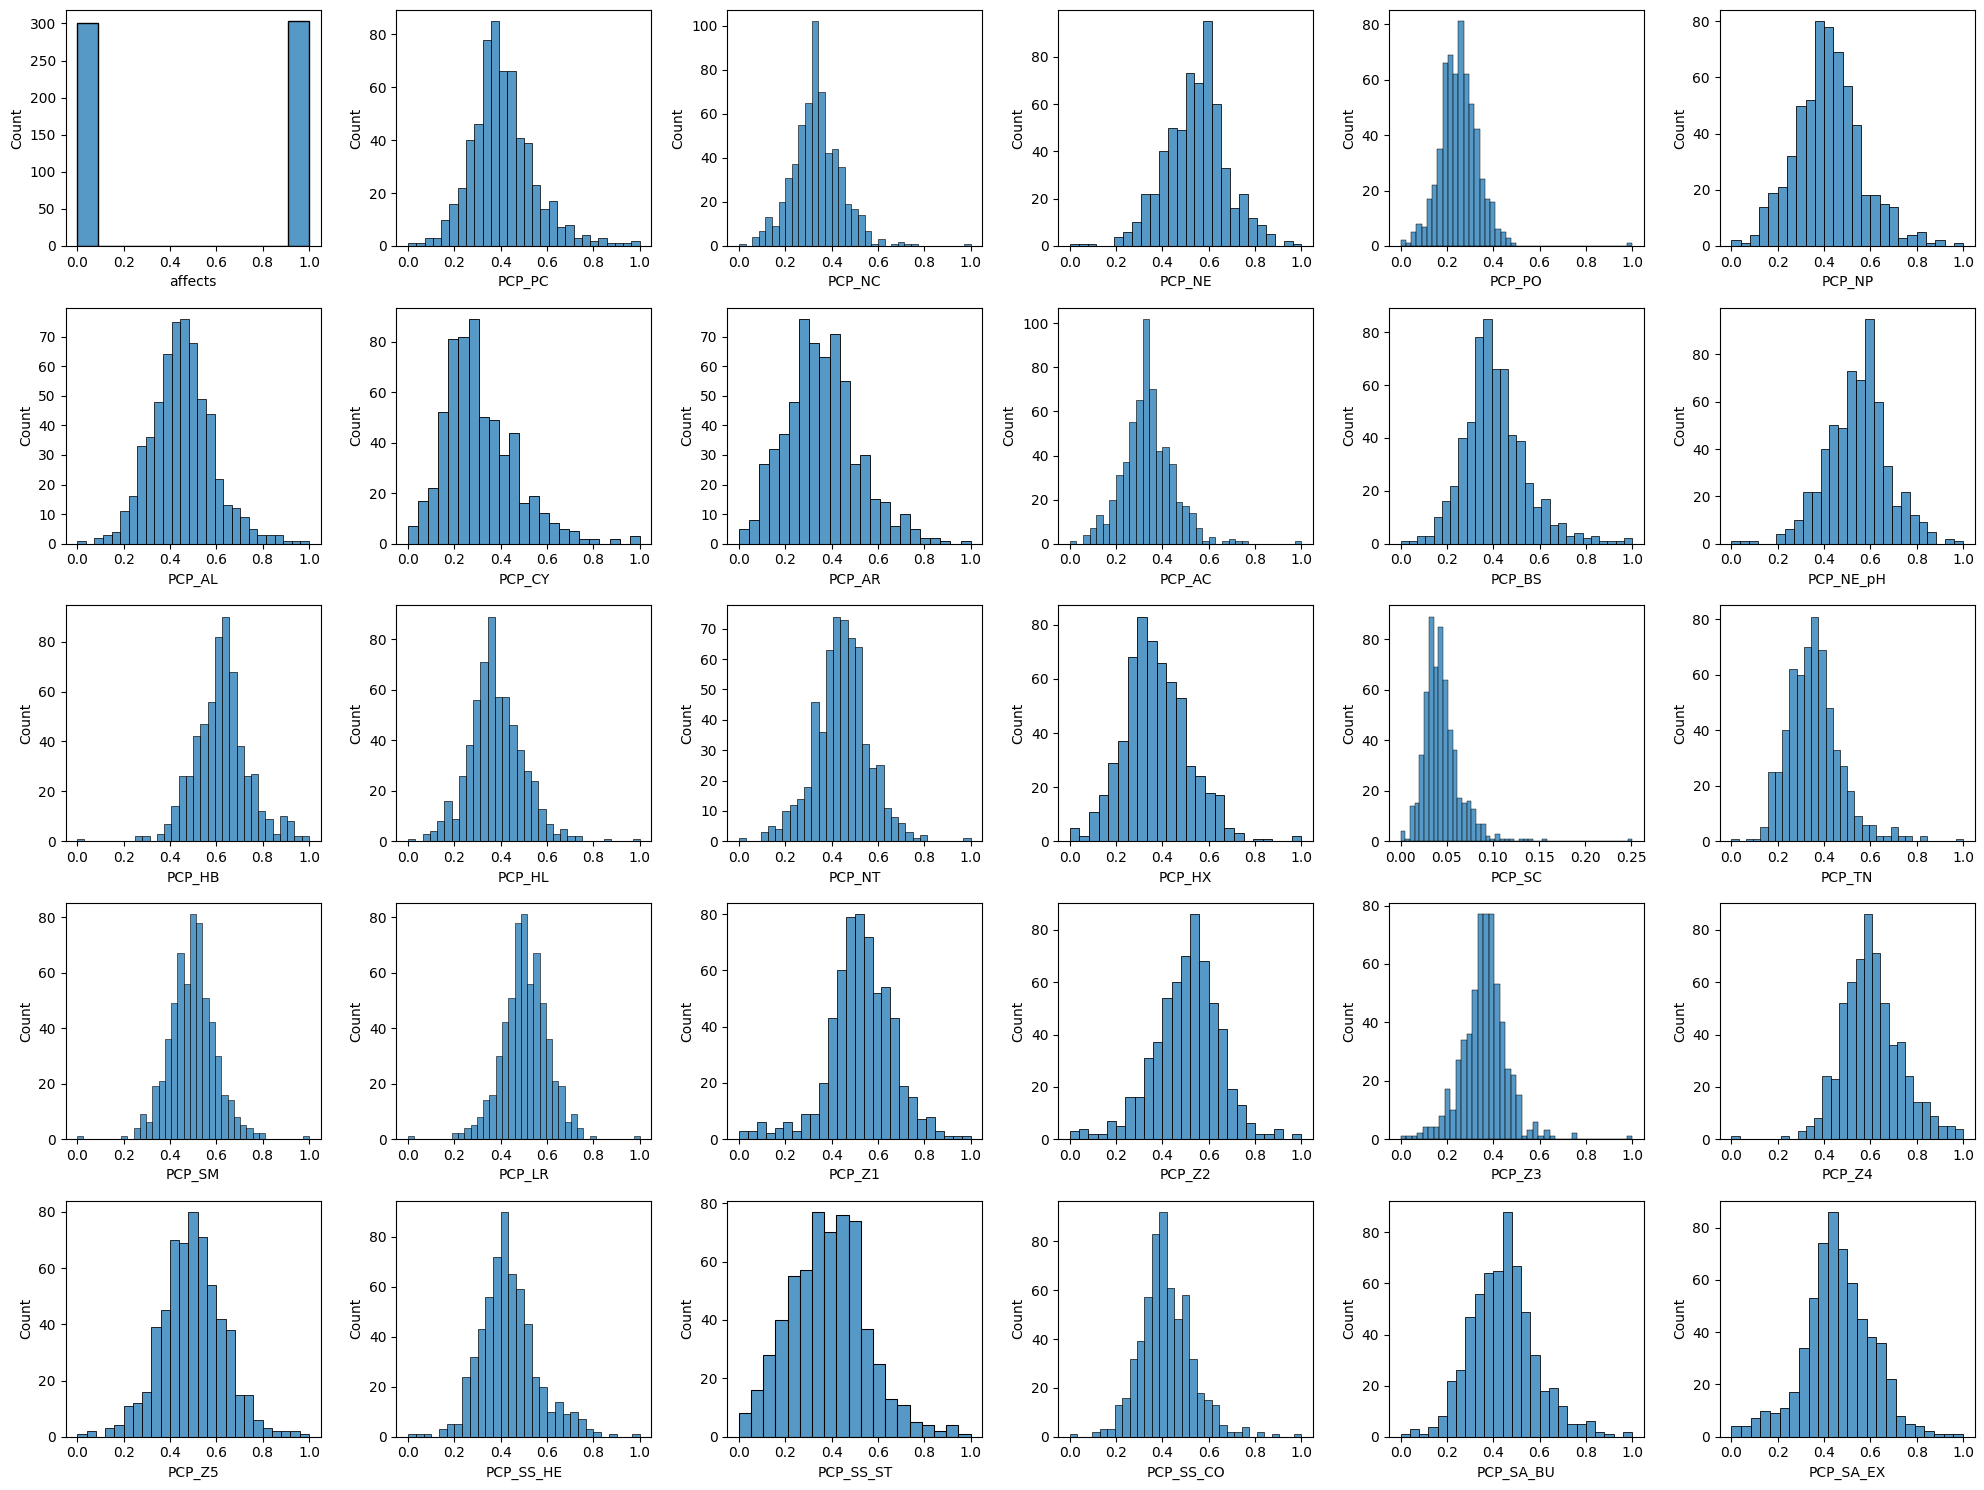

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.stats import pearsonr, spearmanr

In [17]:
df.head()

,affects,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,...,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5,PCP_SS_HE,PCP_SS_ST,PCP_SS_CO,PCP_SA_BU,PCP_SA_EX,PCP_SA_IN
0,0,0.314176,0.352000,0.583893,0.197959,0.538803,0.552273,0.472826,0.391061,0.352000,...,0.487500,0.459173,0.601606,0.558030,0.303411,0.436047,0.533333,0.517937,0.471963,0.466049
1,1,0.348659,0.357333,0.559284,0.197959,0.452328,0.447727,0.222826,0.474860,0.357333,...,0.497794,0.342524,0.539759,0.417351,0.344704,0.531977,0.416667,0.468610,0.464953,0.401235
2,1,0.363985,0.072000,0.789709,0.146939,0.827051,0.722727,0.059783,0.854749,0.072000,...,0.252206,0.272534,0.865060,0.261430,0.326750,1.000000,0.097917,0.988789,0.028037,0.216049
3,0,0.551724,0.213333,0.561521,0.116327,0.560976,0.547727,0.418478,0.525140,0.213333,...,0.707353,0.362142,0.900402,0.516999,0.425494,0.299419,0.487500,0.513453,0.404206,0.376543
4,0,0.356322,0.301333,0.601790,0.240816,0.452328,0.488636,0.293478,0.407821,0.301333,...,0.483824,0.385472,0.619277,0.370457,0.348294,0.529070,0.412500,0.513453,0.422897,0.407407


In [16]:
df['affects'].value_counts()

affects
1    303
0    300
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('affects', axis=1)  # Input variables (features)
y = df['affects']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [ ]:
X_train.to_excel('/content/drive/MyDrive/Test67/train.xlsx',index=False)

In [23]:
X_test.to_excel('/content/drive/MyDrive/Test67/test.xlsx',index=False)

In [21]:
X.head()

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5,PCP_SS_HE,PCP_SS_ST,PCP_SS_CO,PCP_SA_BU,PCP_SA_EX,PCP_SA_IN
0,0.314176,0.352000,0.583893,0.197959,0.538803,0.552273,0.472826,0.391061,0.352000,0.314176,...,0.487500,0.459173,0.601606,0.558030,0.303411,0.436047,0.533333,0.517937,0.471963,0.466049
1,0.348659,0.357333,0.559284,0.197959,0.452328,0.447727,0.222826,0.474860,0.357333,0.348659,...,0.497794,0.342524,0.539759,0.417351,0.344704,0.531977,0.416667,0.468610,0.464953,0.401235
2,0.363985,0.072000,0.789709,0.146939,0.827051,0.722727,0.059783,0.854749,0.072000,0.363985,...,0.252206,0.272534,0.865060,0.261430,0.326750,1.000000,0.097917,0.988789,0.028037,0.216049
3,0.551724,0.213333,0.561521,0.116327,0.560976,0.547727,0.418478,0.525140,0.213333,0.551724,...,0.707353,0.362142,0.900402,0.516999,0.425494,0.299419,0.487500,0.513453,0.404206,0.376543
4,0.356322,0.301333,0.601790,0.240816,0.452328,0.488636,0.293478,0.407821,0.301333,0.356322,...,0.483824,0.385472,0.619277,0.370457,0.348294,0.529070,0.412500,0.513453,0.422897,0.407407


In [22]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: affects, dtype: int64

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
X_train_selected = selector.fit_transform(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)

selected_features = X_train.columns[selected_feature_indices].tolist()

importance_df = X_train[selected_features]

In [24]:
importance_df.shape

(482, 20)

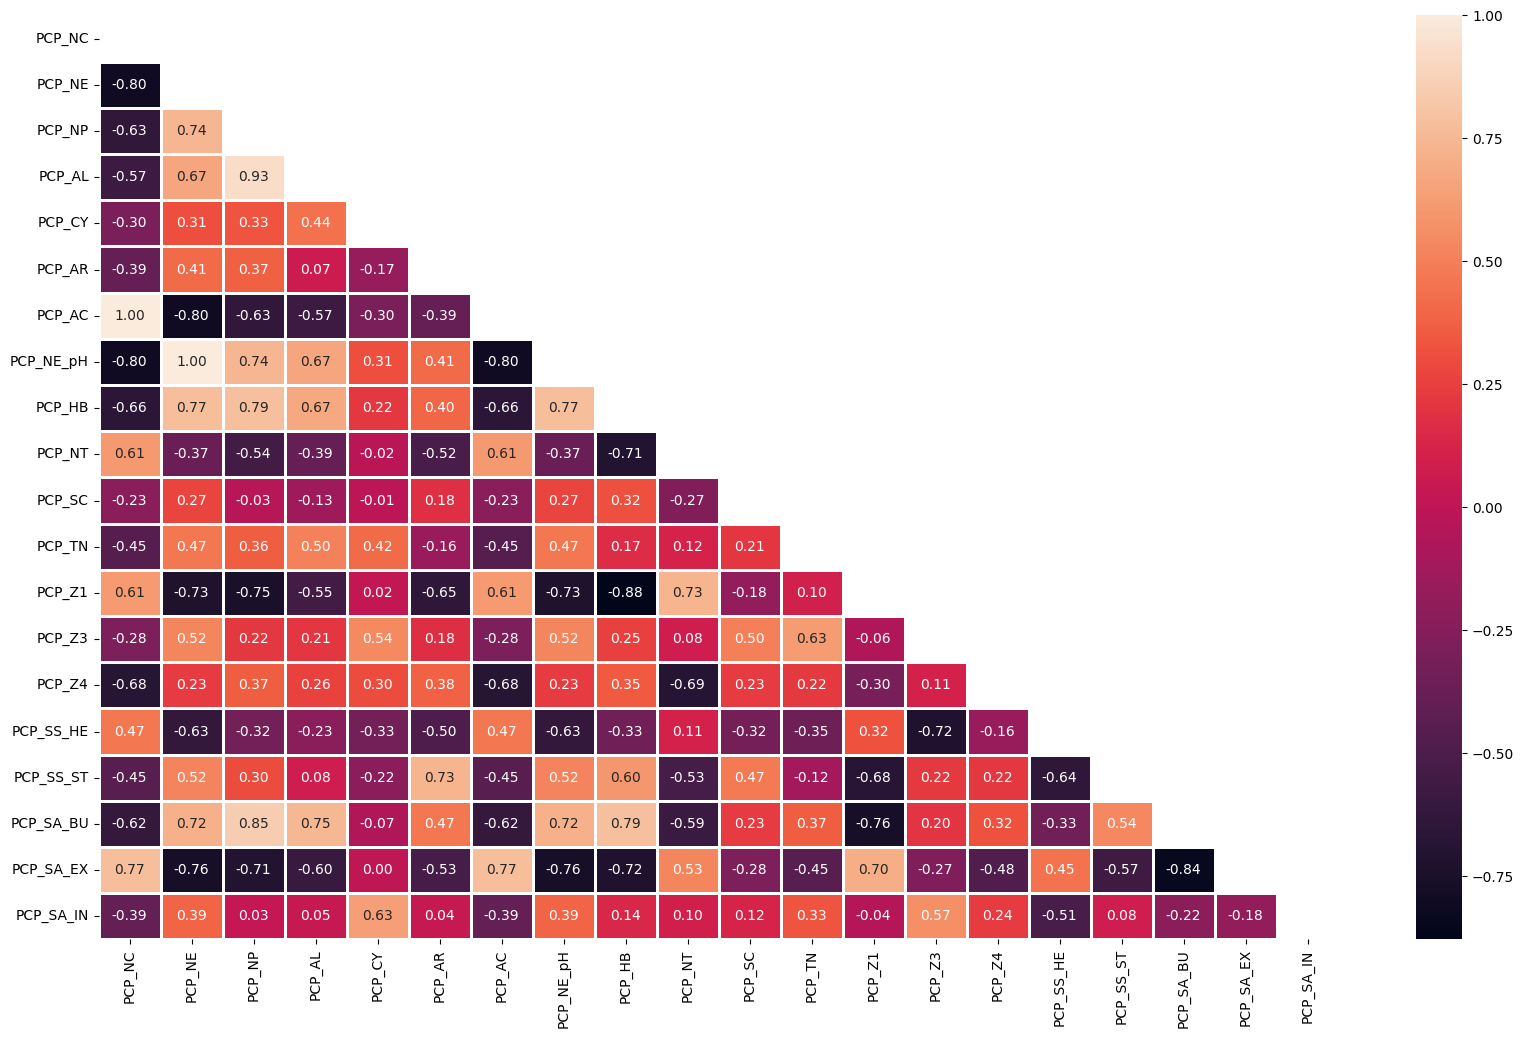

In [25]:
plt.figure(figsize = (20, 12))

corr = importance_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [26]:
corr_matrix = importance_df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_importance_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_importance_df.columns if any(tri_importance_df[x] > 0.75)]

importance_df = importance_df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {importance_df.shape[1]} columns.")

The reduced dataframe has 12 columns.


In [27]:
importance_df.columns

Index(['PCP_AL', 'PCP_CY', 'PCP_AR', 'PCP_NT', 'PCP_SC', 'PCP_TN', 'PCP_Z3',
       'PCP_Z4', 'PCP_SS_HE', 'PCP_SS_ST', 'PCP_SA_EX', 'PCP_SA_IN'],
      dtype='object')

In [28]:
X_train=X_train.loc[:, importance_df.columns]
X_test=X_test.loc[:, importance_df.columns]

In [29]:
X_train=pd.read_excel('train.xlsx')
X_test=pd.read_excel('test.xlsx')

In [30]:
X_train.shape

(482, 30)

MODEL

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,roc_auc_score
import xgboost as xgb
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
)
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
)
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pickle

C:\Users\pubal\AppData\Local\Temp\ipykernel_1572\3321184856.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = results_df._append({"Classifier": classifier, "Test Score": test_accuracy,
c:\Users\pubal\Dropbox\My PC (LAPTOP-E9E4MECD)\Downloads\Test67\Test67\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\pubal\Dropbox\My PC (LAPTOP-E9E4MECD)\Downloads\Test67\Test67\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorith

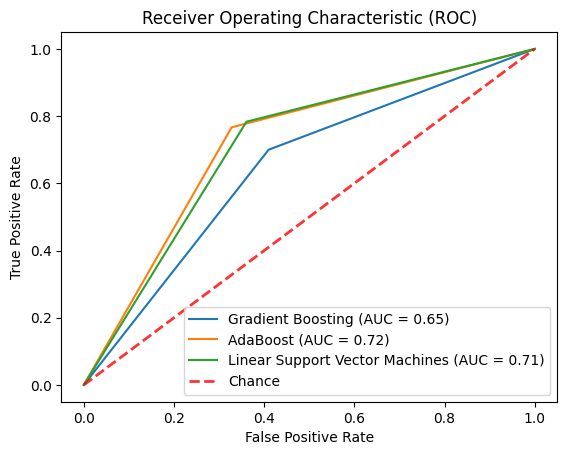

In [19]:
classifiers = [
    ("Gradient Boosting", GradientBoostingClassifier(), {"classifier__n_estimators": [50,100,150, 200,250, 300,350]}),
    ("AdaBoost", AdaBoostClassifier(), {"classifier__n_estimators": [50, 100, 150], "classifier__learning_rate": [0.1,0.3,1.0]}),
    ("Linear Support Vector Machines", LinearSVC(), {"classifier__C": [0.1, 1.0, 10.0]})
]

best_estimators = []

from sklearn.metrics import roc_curve, auc

# Create an empty DataFrame to store the classifier names, test scores, precision, recall, F1-score, and ROC score
results_df = pd.DataFrame(columns=["Classifier", "Test Score", "Precision", "Recall", "F1-score", "ROC Score"])

# Perform hyperparameter tuning for each classifier
for classifier, clf, param_grid in classifiers:
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", clf)
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_
    best_estimators.append(best_estimator)
    with open(classifier+'.pkl', 'wb') as f:
        pickle.dump(best_estimator, f)
    # Evaluate the best estimator on the test set
    y_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)  # Calculate the ROC score

    # Append the classifier name, test score, precision, recall, F1-score, and ROC score to the results DataFrame
    results_df = results_df._append({"Classifier": classifier, "Test Score": test_accuracy,
                                    "Precision": precision, "Recall": recall, "F1-score": f1,
                                    "ROC Score": roc_score},
                                   ignore_index=True)

    # Compute ROC curve and area under the curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current classifier
    plt.plot(fpr, tpr, label=f'{classifier} (AUC = {roc_auc:.2f})')

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

# Set legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

eclf = VotingClassifier(
      estimators=[('gb', best_estimators[0]), ('ada', best_estimators[1]), ('lsvm', best_estimators[2])],
      voting='hard')

eclf.fit(X_train, y_train)

results = pd.DataFrame(columns=["Classifier", "Test Score", "Precision", "Recall", "F1-score", "ROC Score"])

for clf, label in zip([best_estimators[0], best_estimators[1], best_estimators[2], eclf], ['Gradient Boosting', 'AdaBoost', 'Linear SVM', 'Ensemble']):
      y_pred = clf.predict(X_test)
      test_accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      roc_score = roc_auc_score(y_test, y_pred)
      
      results = results._append({"Classifier": label, "Test Score": test_accuracy,
                                    "Precision": precision, "Recall": recall, "F1-score": f1,
                                    "ROC Score": roc_score},
                                   ignore_index=True)

      


results.to_excel("Ensemble_result.xlsx")


c:\Users\pubal\Dropbox\My PC (LAPTOP-E9E4MECD)\Downloads\Test67\Test67\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\pubal\Dropbox\My PC (LAPTOP-E9E4MECD)\Downloads\Test67\Test67\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\pubal\AppData\Local\Temp\ipykernel_1572\1002354867.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = results._append({"Classifier": label, "Test

In [21]:
import pickle

with open('ensemble_model.pkl', 'wb') as f:
    pickle.dump(eclf, f)

In [ ]:
with open('your_model.pkl', 'rb') as file:
    model = pickle.load(file)

<ipython-input-37-622f8fb59e3f>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


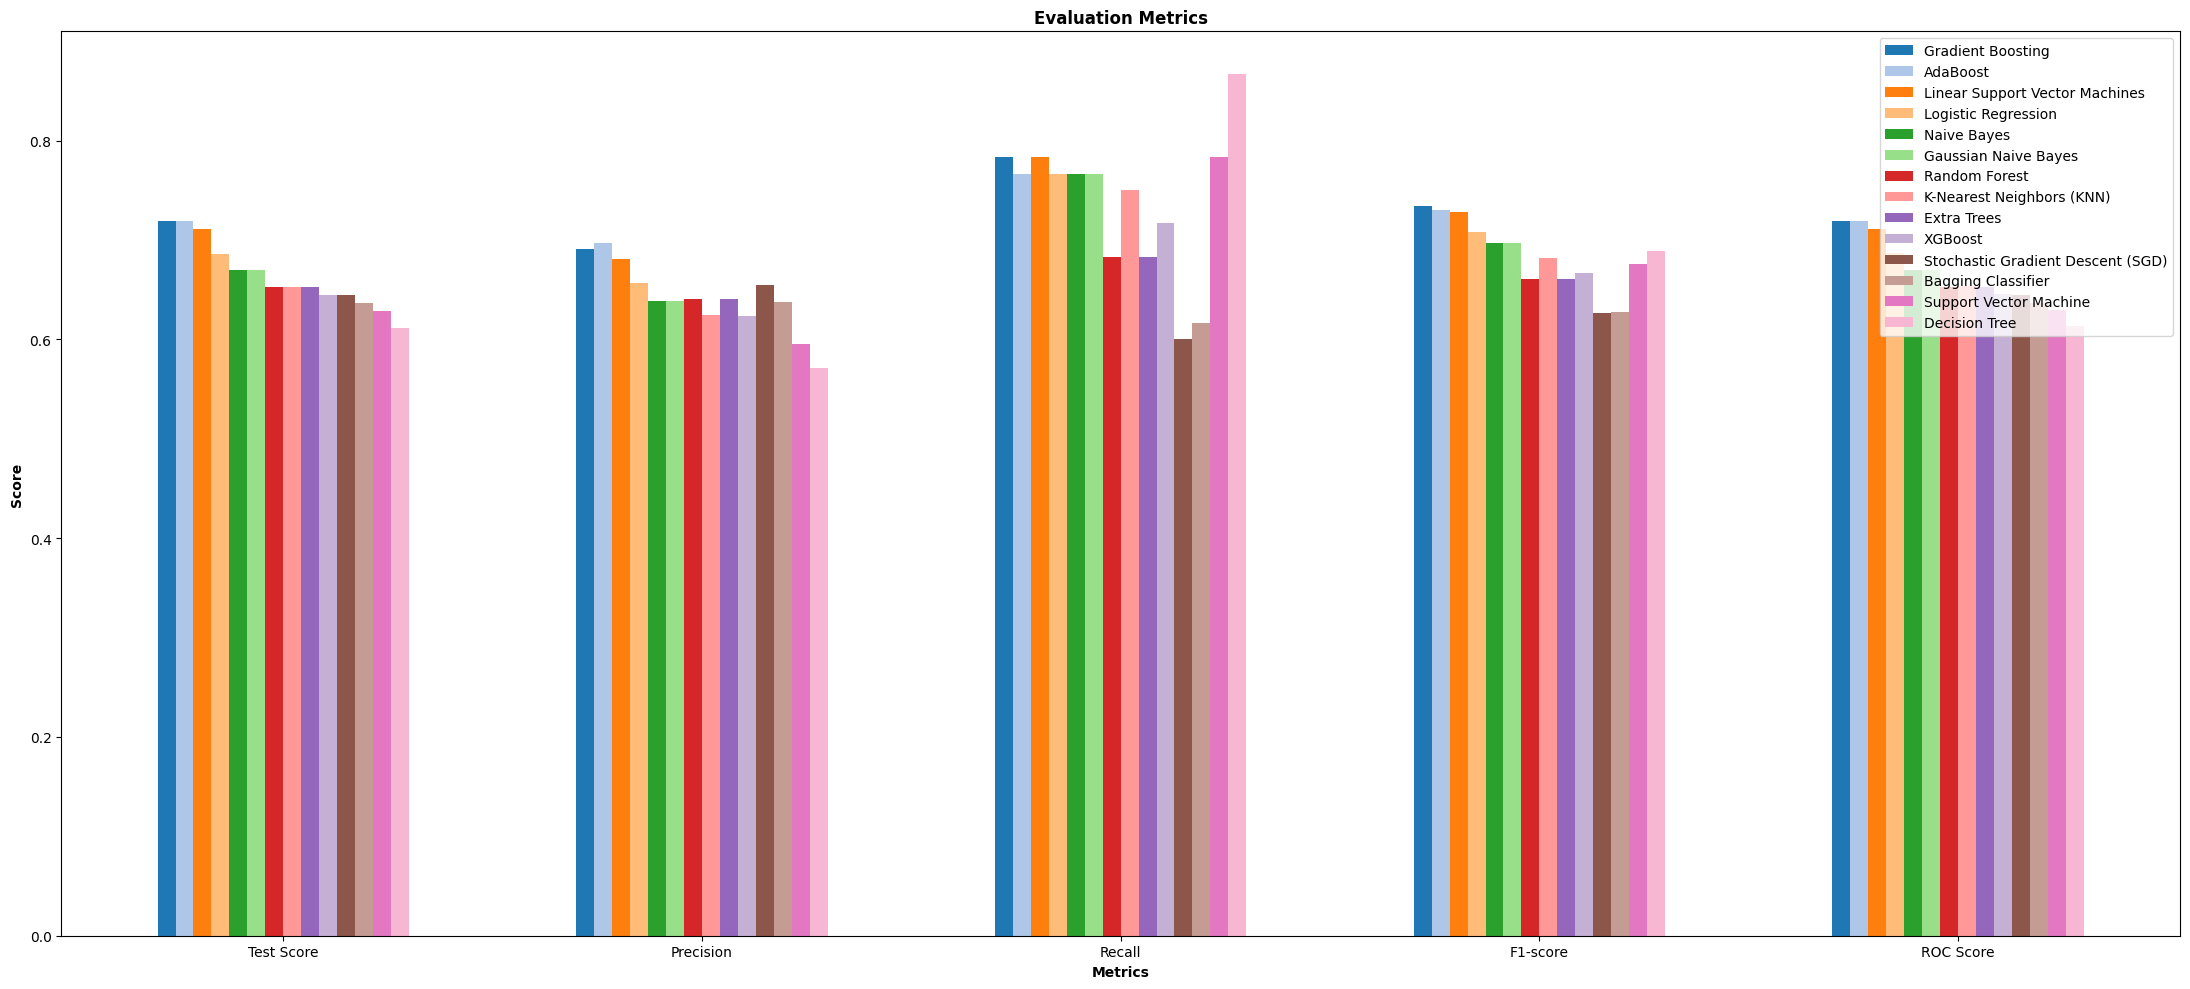

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

# Increase the figure size to fit the entire results_df
plt.figure(figsize=(22, 10))

# Set the evaluation metric labels
evaluation_metrics = ["Test Score", "Precision", "Recall", "F1-score", "ROC Score"]

# Sort the results_df DataFrame based on the desired metric (e.g., "Test Score")
sorted_df = results_df.sort_values(by="Test Score", ascending=False)

# Set the positions of the bars on the x-axis
r = np.arange(len(evaluation_metrics))

# Calculate the bar width based on the number of classifiers and metrics
num_classifiers = len(sorted_df)
bar_width = 0.6 / num_classifiers

# Create a colormap with the number of colors based on the number of classifiers
cmap = get_cmap('tab20')

# Plot the bars for each classifier and evaluation metric
for i, classifier in enumerate(sorted_df["Classifier"]):
    values = sorted_df.loc[sorted_df["Classifier"] == classifier, evaluation_metrics].values.flatten()
    color = cmap(i % cmap.N)
    plt.bar(r + i * bar_width, values, color=color, width=bar_width, label=classifier)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Metrics', fontweight='bold',fontsize='medium')
plt.ylabel('Score',fontweight='bold',fontsize='medium')
plt.title('Evaluation Metrics',fontweight='bold',fontsize='large')

# Set the x-axis tick positions and labels
plt.xticks(r + (num_classifiers - 1) * bar_width / 2, evaluation_metrics)

# Move the legend to the lower right and reduce the fontsize
plt.legend(loc='upper right', fontsize='medium')

# Adjust the spacing around the plot
plt.tight_layout()

# Display the bar chart
plt.show()



In [38]:
results_df.to_excel('/content/drive/MyDrive/Test67/results_2.xlsx',index=False)